In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import pynbody
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

%matplotlib inline
print(mpl.get_backend())
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

module://ipykernel.pylab.backend_inline


In [11]:
def read_file(path, halo_num):
    data = []
    with open(path,'rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    data = pd.DataFrame(data)
    
    if not halo_num=='all':
        data = data[data.z0haloid == halo_num]

    return data

h148 = read_file('/home/akinshol/Data/Timescales/DataFiles/h148.data','all')
# h229 = read_file('/home/akinshol/Data/Timescales/DataFiles/h229.data','all')
h242 = read_file('/home/akinshol/Data/Timescales/DataFiles2/h242.data','all')
h329 = read_file('/home/akinshol/Data/Timescales/DataFiles2/h329.data','all')

7.0 29.0 31.0 32.0 55.0 94.0 116.0 119.0 131.0 154.0 443.0 

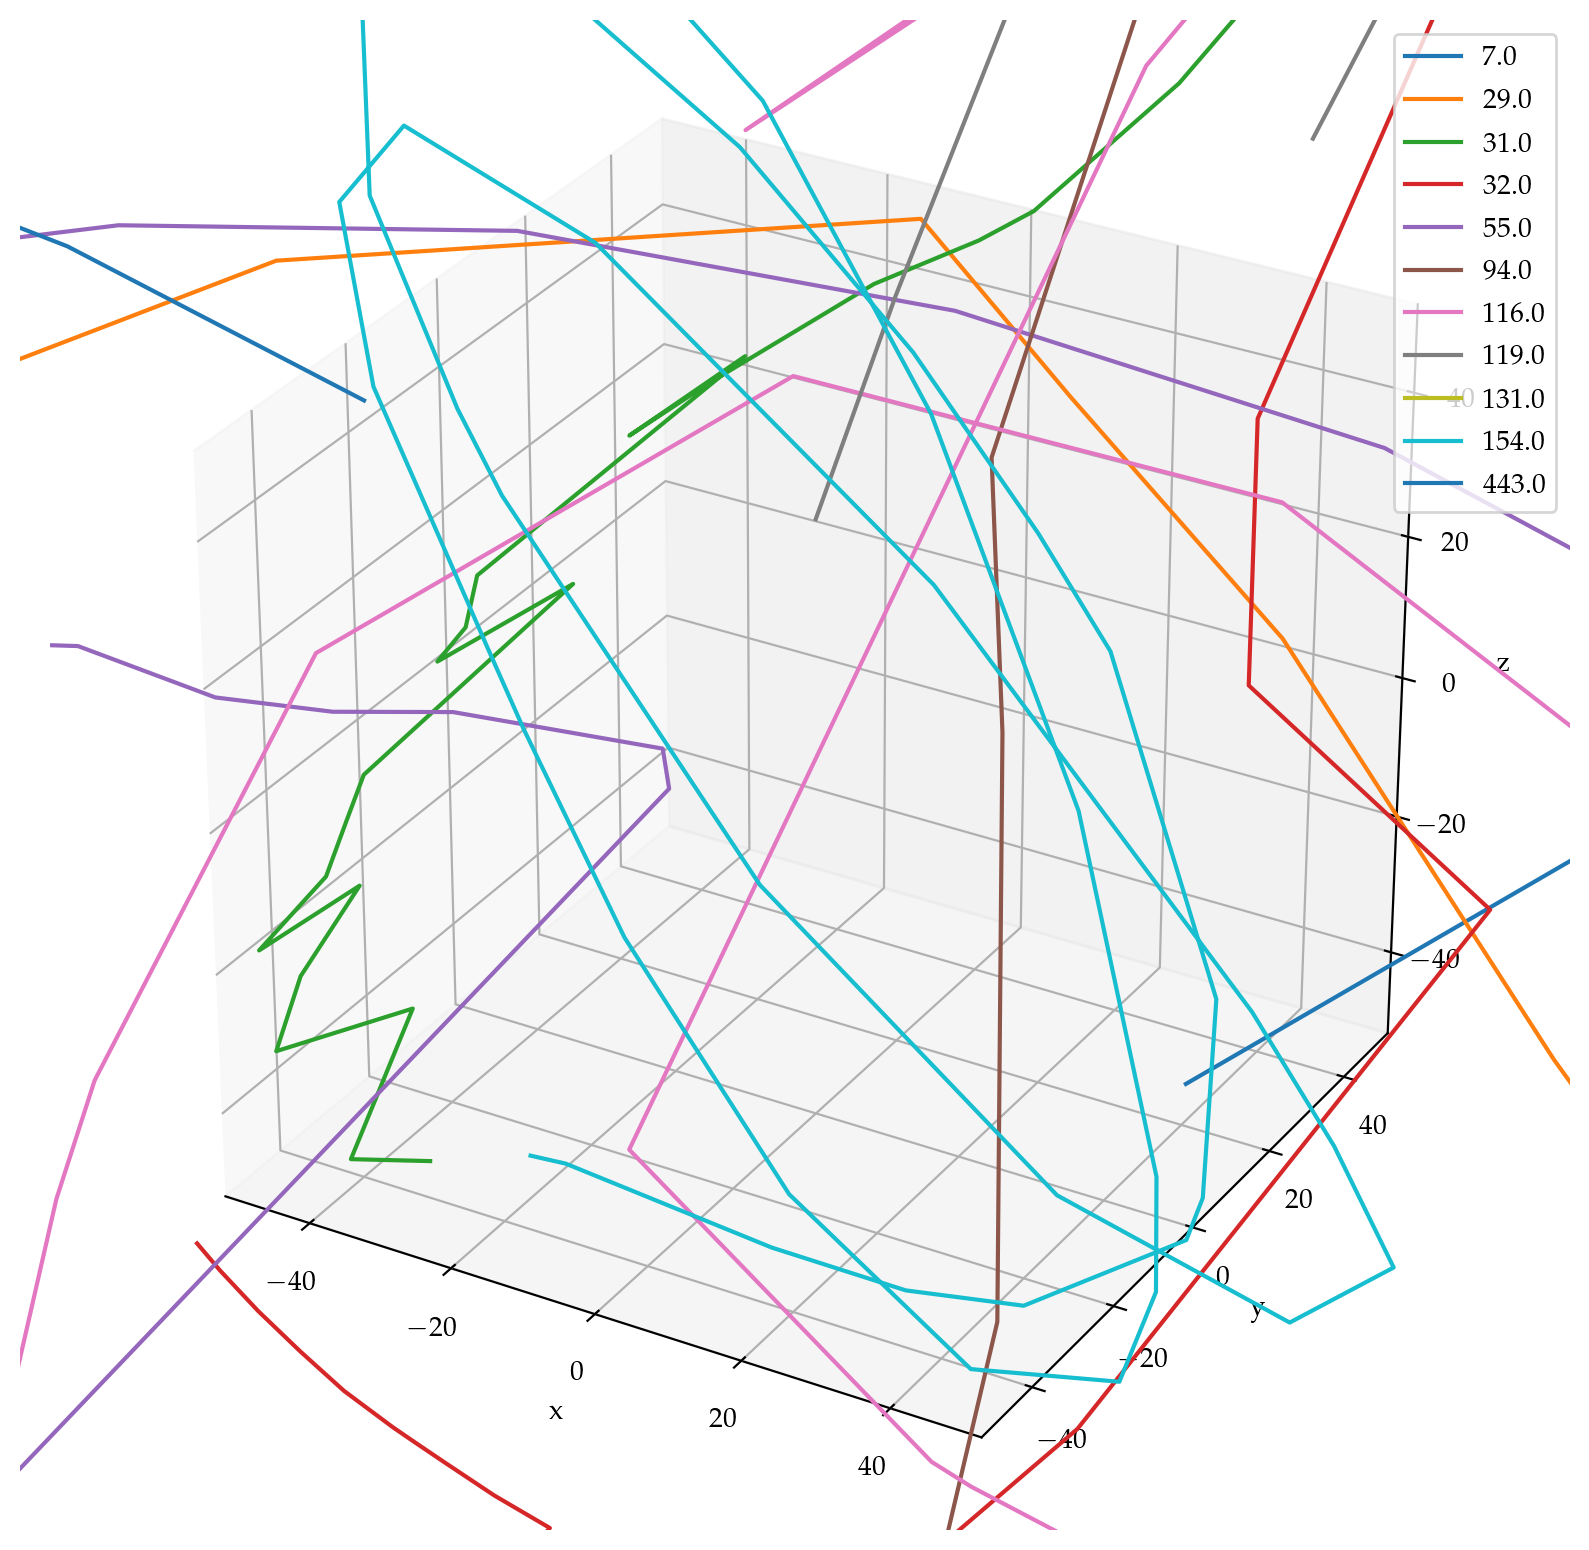

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import scipy
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')

width = 100
sim = h329
for i in np.unique(sim.z0haloid):
    print(i, end=' ')
    sim2 = sim[(sim.z0haloid==i)&(sim.time > 3)]
    t = np.array(sim2.time,dtype=float)
    x, y, z = np.array(sim2.x,dtype=float), np.array(sim2.y,dtype=float),np.array(sim2.z,dtype=float)

    ax.plot(x, y, z, label=str(i))
    

ax.set_xlim(-width/2,width/2)
ax.set_ylim(-width/2,width/2)
ax.set_zlim(-width/2,width/2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')  
ax.legend()
fig.show()

In [47]:
sim = h242


sim2 = sim[(sim.z0haloid==48)&(sim.time > 1)]
x = np.array(sim2.x, dtype=float)
t = np.array(sim2.time, dtype=float)

In [50]:
tck = scipy.interpolate.splrep(t,x,s=0)
tnew = np.arange(4,13,0.1)
xnew = scipy.interpolate.splev(tnew, tck, der=0)

xnew

ValueError: Error on input data